# Assignment 2: Plotting temperature over time, using data from a CSV file
## Author: Myles Henehan
*******

## Approach
In order to carry out this assignment, I will take the following steps:
1. Import the relevant libraries
2. Read in the data from CSV
3. Visualise the data using an appropriate plot type
4. Add some extra details such as labels and legends to make the data easier to read.

In [15]:
# Importing useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Reading in the csv file 

FILENAME = "weatherreadings1.csv"

df = pd.read_csv(FILENAME)

# Checking it's been read in correctly
df.info()
# reportStartDateTime is an object data type, so I want to convert this to date-time format
time = pd.to_datetime(df['reportStartDateTime'])
temp = df['dryBulbTemperature_Celsius']
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

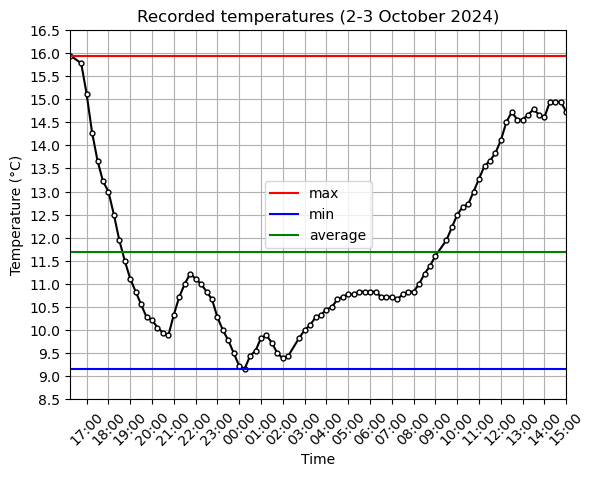

In [17]:
#Plotting our 2 variables
fig, ax = plt.subplots()
ax.plot(time, temp, marker='o', color= 'black', markersize=3.5, markerfacecolor = 'white')


# Adding labels and Title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Recorded temperatures (2-3 October 2024)')


# Making additions to the x axis, using the documentation on date plotting from the matplotlib website (https://matplotlib.org/stable/api/dates_api.html)
import matplotlib.dates as mdates
# Formatting the x-axis with major ticks every hour
ax.xaxis.set_major_locator(mdates.HourLocator())  # Major ticks every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format tick labels as Hour:Minute

# Rotate the x-axis labels for better readability (GeeksforGeeks, 2022)
plt.xticks(rotation=45)

# Setting limits
starttime = time[0]
endtime = time[len(time)-1]
ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))


# Making changes to the y axis
ax.set_yticks(np.arange(8.5, 17, 0.5))

# adding a grid for readability
ax.grid()

# Let's plot lines to show max, min and average temperatures over this time period
max_temp = temp.max()
min_temp = temp.min()
avg_temp = temp.mean()

ax.axhline(max_temp, color='r', label='max')
ax.axhline(min_temp, color='b', label='min')
ax.axhline(avg_temp, color='g', label="average")

ax.legend()


plt.show()

# References

- GeeksforGeeks (2022). *How to Rotate X-Axis Tick Label Text in Matplotlib?*. Available at: https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/ [Accessed 12 October 2024].
- Matplotlib Development Team (2024). *matplotlib.dates*. Available at: https://matplotlib.org/stable/api/dates_api.html [Accessed: 12 October 2024].
